In [3]:
!python --version

Python 3.13.2


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def sigmoid(x,w,b):
    return 1/(1+np.exp(-(w*x+b)))

In [6]:
sigmoid(0,1,0)

np.float64(0.5)

In [7]:
w = 0.9
b = 0.1
x = np.linspace(-10,10,100)
y = sigmoid(x,w,b)

In [8]:
type(x)

numpy.ndarray

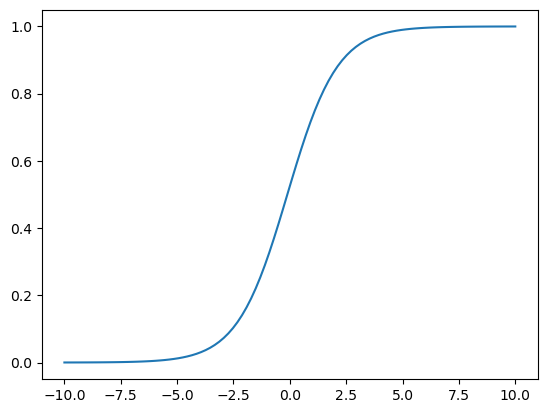

In [9]:
plt.plot(x,y)
plt.show()

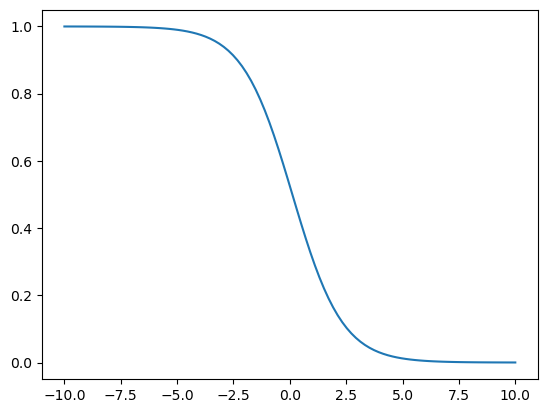

In [10]:
w  = -0.9
y= sigmoid(x,w,b)
plt.plot(x,y)
plt.show()

In [11]:
# !pip install ipywidgets

In [12]:
from ipywidgets import interact

def plot_sigmoid(w):
    y = sigmoid(x, w, b)
    plt.plot(x, y)
    plt.title(f"Sigmoid with w={w}")
    plt.show()

interact(plot_sigmoid, w=(-2.0, 2.0, 0.1))


interactive(children=(FloatSlider(value=0.0, description='w', max=2.0, min=-2.0), Output()), _dom_classes=('wi…

<function __main__.plot_sigmoid(w)>

In [13]:
def sigmoid_2d(x1, x2, w1, w2, b):
    return 1/(1+np.exp(-(w1*x1 + w2*x2 + b)))

In [14]:
sigmoid_2d(1,2,0.5,0.5,0)

np.float64(0.8175744761936437)

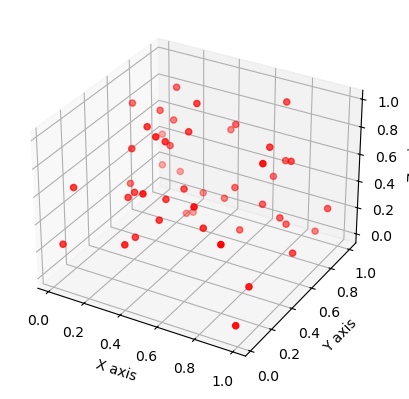

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Data
x = np.random.rand(50)
y = np.random.rand(50)
z = np.random.rand(50)

# Create figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot scatter
ax.scatter(x, y, z, c='r', marker='o')

# Labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

In [16]:
x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100)
xx1, xx2 = np.meshgrid(x1, x2)

print(x1.shape,xx1.shape)

(100,) (100, 100)


In [17]:
w1, w2, b = 0.5, 2.0, 0
y = sigmoid_2d(xx1, xx2, w1,w2,b)

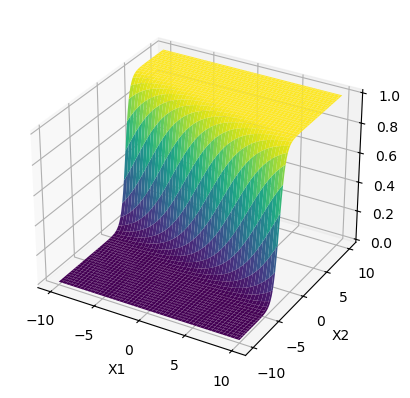

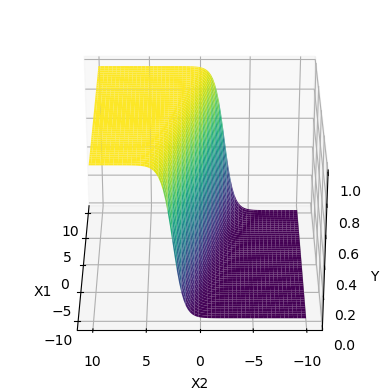

In [18]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(xx1, xx2, y, cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

ax.view_init(elev=30, azim=180)
fig

## plotting loss

In [19]:
# compute loss for a given dataset

In [20]:
w_unknown = 1.5
b_unknown = -0.5

x = np.random.random(25)*20 - 10
y = sigmoid(x,w_unknown,b_unknown)

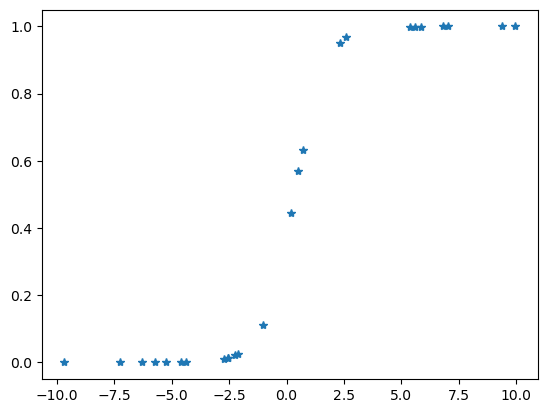

In [21]:
plt.plot(x,y,'*')
plt.show()

In [22]:
def calculate_loss(x,y,w_est,b_est):
    loss = 0
    for x, y in zip(x,y):
        loss += (y - sigmoid(x,w_est,b_est))**2
    return loss

In [23]:
w = np.linspace(-1,1,100)
b = np.linspace(-1,1,100)



ww,bb = np.meshgrid(w,b)
ww.shape, bb.shape

loss = np.zeros(ww.shape)

In [24]:

for i in range(ww.shape[0]):
    for j in range(ww.shape[1]):
        loss[i,j] = calculate_loss(x,y,ww[i,j],bb[i,j]) # TODO
        

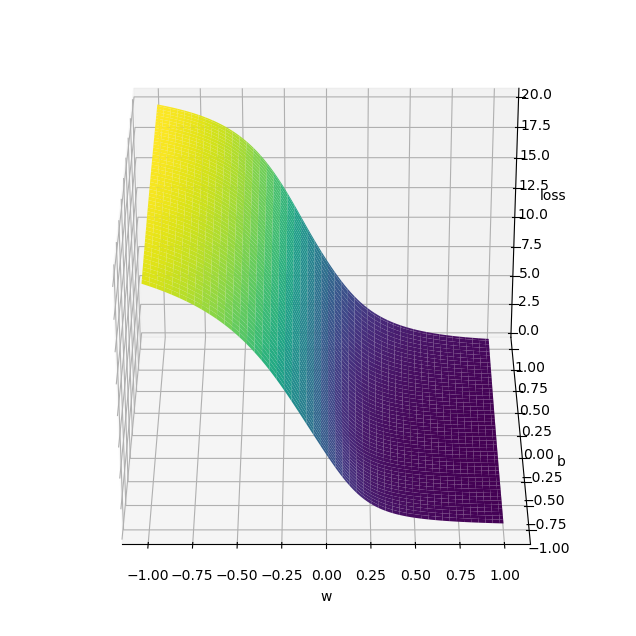

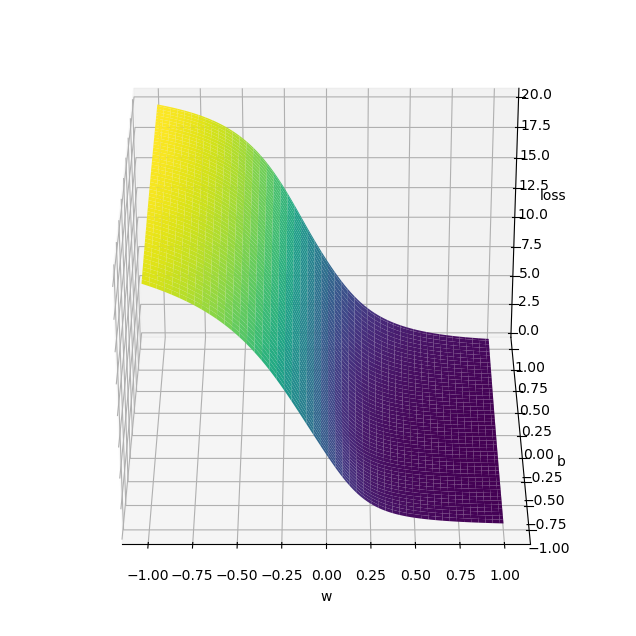

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(ww, bb, loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss')
plt.show()

ax.view_init(elev=30, azim=270)
fig

In [40]:
ij = np.argmax(loss)
i, j = np.unravel_index(ij, loss.shape)
ww[i,j]

np.float64(-1.0)

In [42]:
bb[i,j]

np.float64(1.0)

# contour plot

In [45]:
xx1.shape

(100, 100)

In [48]:
y.shape

(25,)

In [49]:
# plt.contourf(xx1, xx2, y, levels=50, cmap='viridis')


# class for sigmoid


In [ ]:
class SigmoidNeuron:
    def __init__(self):
        self.w = None
        self.b = None
    
    def perceptron(self, x):
        return np.dot(self.w, x) + self.b
    
    def sigmoid(self, x):
        return 1.0/(1.0+np.exp(-x))
    
    def grad_w(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * x
    
    def grad_b(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred)
    
    def fit(self, X, Y, epochs=1, lr=1, init=True):
        if init:
            self.w = np.random.randn(1,X.shape[1])
            self.b = 0
        for epoch in range(epochs):
            dw , db = 0, 0
            for x, y in zip(X,Y):
                dw += self.grad_w(x,y)
                db += self.grad_b(x,y)
            self.w -= lr * dw
            self.b -= lr * db


In [56]:
x = np.asarray(([2.5, 2.5],[4,-1],[1,-4],[-1,4],[-2.5,-2.5],[-4,1],[-1,4],[1,-4]))
y= [1,1,1,1,0,0,0,0]

In [59]:
sn = SigmoidNeuron()
sn.fit(x,y, epochs=1000, lr=0.01)
for i in range(10):
    print(sn.w, sn.b)
    sn.fit(x,y, 1, 0.25, init=False)

[[0.96434672 0.24231521]] [-6.02816408e-19]
[[0.96858826 0.24334876]] [2.86663054e-18]
[[0.9727198  0.24435628]] [2.71527592e-17]
[[0.97674694 0.2453388 ]] [2.71527592e-17]
[[0.98067479 0.24629753]] [2.02138653e-17]
[[0.98450813 0.2472336 ]] [-6.02816408e-19]
[[0.98825135 0.24814805]] [-6.02816408e-19]
[[0.9919086  0.24904186]] [-6.02816408e-19]
[[0.99548371 0.24991593]] [2.86663054e-18]
[[0.99898027 0.25077112]] [2.02138653e-17]


In [60]:
print(sn.w, sn.b)

[[1.00240165 0.25160823]] [3.06222062e-17]


## subplots